# Index
- [Cleaning](#Cleaning)
- [EDA](#EDA)
- [Questions](#Questions)

In [104]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 

In [105]:
data = pd.read_csv('Data/0_Demographic_data.csv')

# Cleaning

In [106]:
data = data.drop_duplicates()

In [107]:
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [108]:
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

# EDA

In [109]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


- In-store column
    - 1: in-store purchases
    - 0: online purchases
- Region column
    - 1: North
    - 2: South
    - 3: East
    - 4: West

In [110]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


- The average age is 46 years old.
- Each transaction has an average of 5 items.
- The average amount spent per transaction is $836.

In [111]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


Every column is a number type.

In [113]:
print('Transactions per',data.groupby('region')['region'].count())
print('Total number of transactions:',data['region'].count())

Transactions per region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64
Total number of transactions: 79979


In [114]:
print('Total number of items per',data.groupby('region')['items'].sum())

Total number of items per region
1     72151
2     90229
3     80892
4    117044
Name: items, dtype: int64


In [134]:
print('Average number of items per',data.groupby('region')['items'].mean())

Average number of items per region
1    4.510283
2    4.512804
3    4.494000
4    4.503771
Name: items, dtype: float64


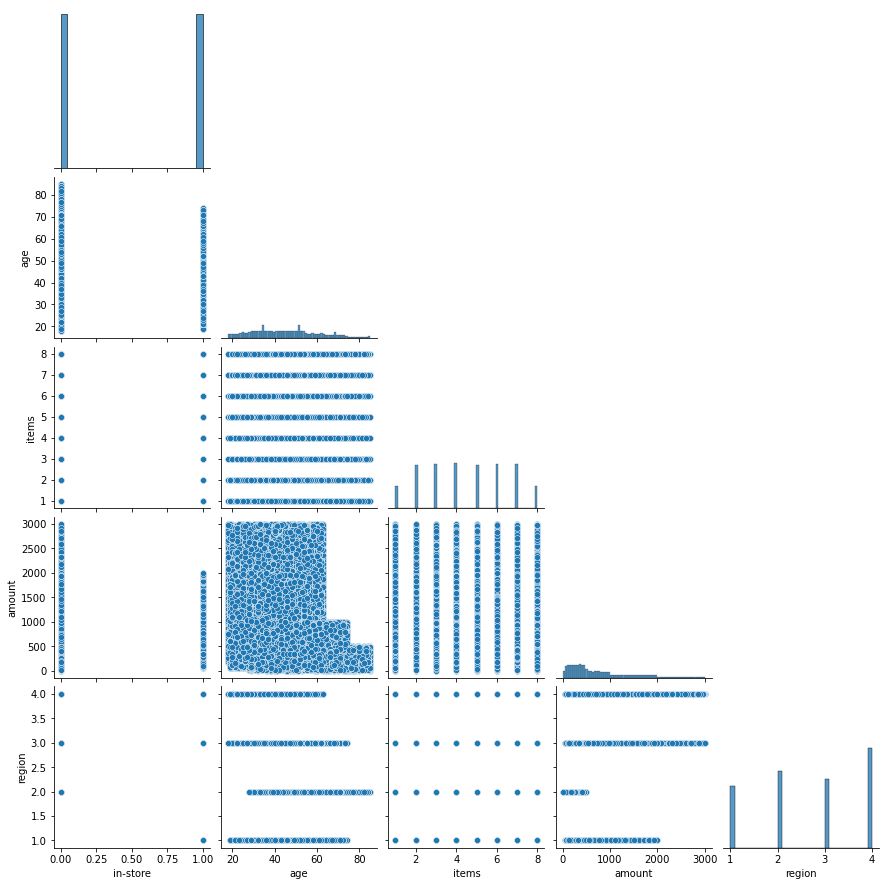

In [140]:
sns.pairplot(data, corner=True)

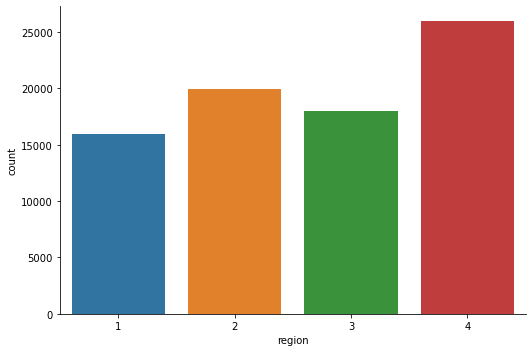

In [116]:
fg = sns.catplot(x = 'region', data = data, kind = 'count', aspect = 1.5)

- Region 4 has the most transactions, and region 1 has the least transactions.

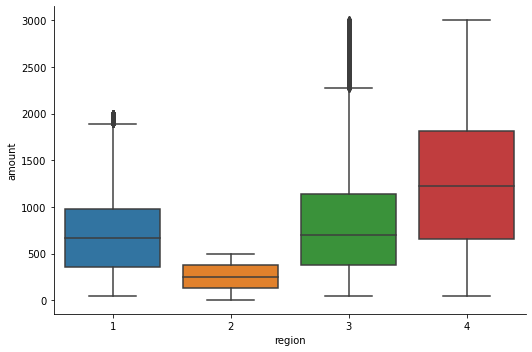

In [117]:
fg = sns.catplot(x = 'region', y = 'amount', data = data,kind = 'box', aspect = 1.5)

- **Region 4** has the most amount of transactions

In [118]:
data.groupby('in-store')['items'].sum()

in-store
0    180477
1    179839
Name: items, dtype: int64

- Items purchased online and in-store:
|online|in-store|
|-----|------|
|180477|179839|

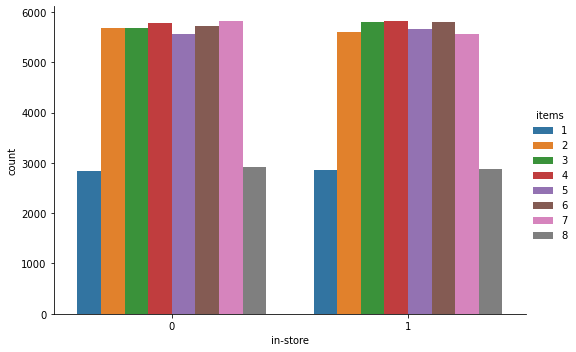

In [119]:
sns.catplot(x = 'in-store', hue = 'items', data = data, kind = 'count', aspect = 1.5)

- The amount of items purchased **online** and **in-store** is almost the same.

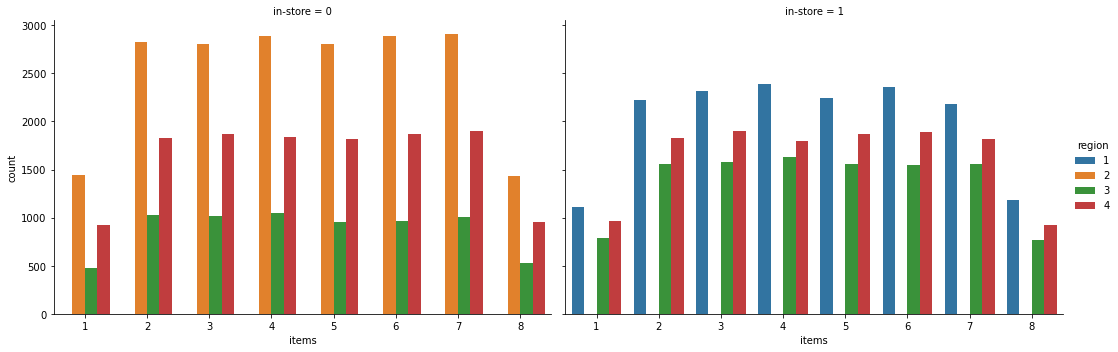

In [120]:
sns.catplot(x = 'items', hue = 'region', col = 'in-store', data = data, kind = 'count', aspect = 1.5)

- Region 2 buys online the most and doesn't buy in-store
- Region 1 buys in-store the most and doesn't buy online
- People tend to buy between 2 and 7 items.

In [121]:
data.groupby(['in-store','region'])['in-store'].count()

in-store  region
0         2         19994
          3          7001
          4         12994
1         1         15997
          3         10999
          4         12994
Name: in-store, dtype: int64

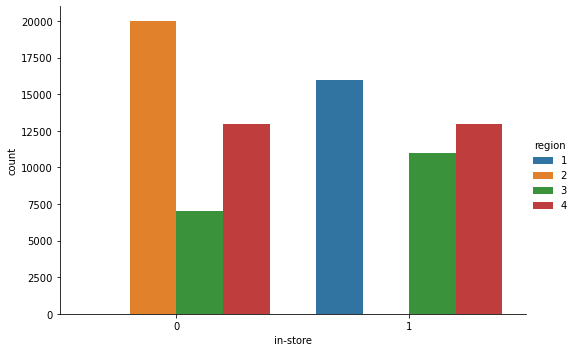

In [122]:
g = sns.catplot(x = 'in-store', data = data, hue = 'region', kind = 'count', aspect = 1.5)

In [123]:
data.pivot_table('items', 'in-store', 'region', aggfunc = np.sum, margins = True)

region,1,2,3,4,All
in-store,,,,,
0,NaN,90229.0,31515.0,58733.0,180477
1,72151.0,NaN,49377.0,58311.0,179839
All,72151.0,90229.0,80892.0,117044.0,360316


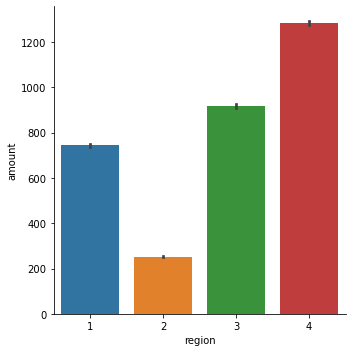

In [125]:
m = sns.catplot( x = 'region', y = 'amount', data = data, kind = 'bar')

<AxesSubplot:xlabel='region'>

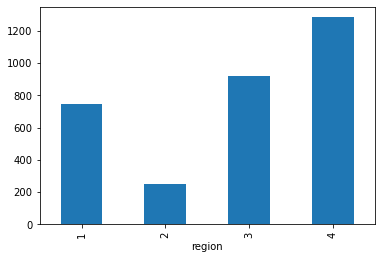

In [126]:
data.groupby('region')['amount'].mean().plot.bar()

In [127]:
data.groupby('region').mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


- **Region 4** spends more per transaction
- **Region 2** spends less per transaction

In [128]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [129]:
data.corr()

,in-store,age,items,amount,region
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


In [130]:
data.cov()

,in-store,age,items,amount,region
in-store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305
items,-0.004017,0.021270,4.248751,0.570791,-0.004421
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321


<AxesSubplot:>

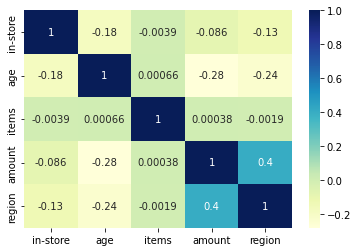

In [131]:
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")

# Questions

## Question 1

1. Do customers in different regions spend more per transaction? Which region spends the most/least?

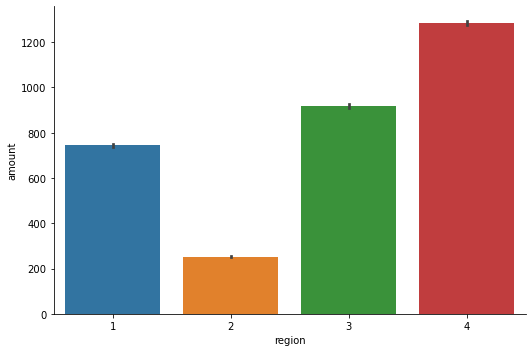

In [132]:
fg = sns.catplot(x = 'region', y = 'amount', data = data, kind = 'bar', aspect = 1.5)

- Region 4 spent the most.
- Region 2 spent the least.

## Question 2
Is there a relationship between the number of items purchased and the amount spent? Short answer: no

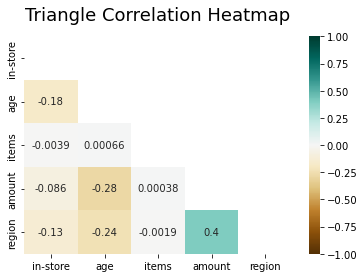

In [133]:

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- **In-Store**
    - **In-store and age have a negative correlation. When age increases then in-store decreases. Therefore older people tend to buy in-store and younger people online**.
    - In-store and items have a negative correlation but it is very close to 0. This implies a very weak or non existent linear relationship between the variables.
    - In-store and amount have a negative correlation but it is very close to 0. This implies a very weak or non existent linear relationship between the variables.
    - **In-store and region have a negative correlation. When region increases then in-store decreases. The North tends to buy in-store.The West tends to buy online. Therefore the regions North, South, East, West (in that order) are less likely to buy in-store**. 
        - North (1)
        - South (2)
        - East (3)
        - West (4)
- **Age**
    - Age and items have a positive correlation but it is very close to 0. This implies a very weak or non existent linear relationship between the variables.
    - **Age and amount have a negative correlation. When amount increases then age decreases. Therefore, older people tend to spend a higher amount than younger people**.
    - **Age and region have a negative correlation. When region increases then age decreases. Therefore, people from the West region tends to have younger people than the rest of the regions. The North tends to have the oldest people**.
- **Items**
    - Items and amount have a positive correlation but it is very close to 0. This implies a very weak or non existent linear relationship between the variables.
    - Items and region have a negative correlation but it is very close to 0. This implies a very weak or non existent linear relationship between the variables.
- **Amount**
    - **Amount and region have a positive correlation. When amount increases then region increases. Therefore, people on the West tend to spend a higher amount than the people on the North**. 
- Region has a stronger linear relationship with amount than age.